In [28]:
import os
import sys
import math

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [34]:
ROOT_PATH = os.path.abspath('.\\')

print('Project directory path:', ROOT_PATH)


def get_path(rel_path):
    return os.path.join(ROOT_PATH, rel_path)

Project directory path: D:\My Work\VR


In [35]:
def bgr2rgb(bgr_img):
    return cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

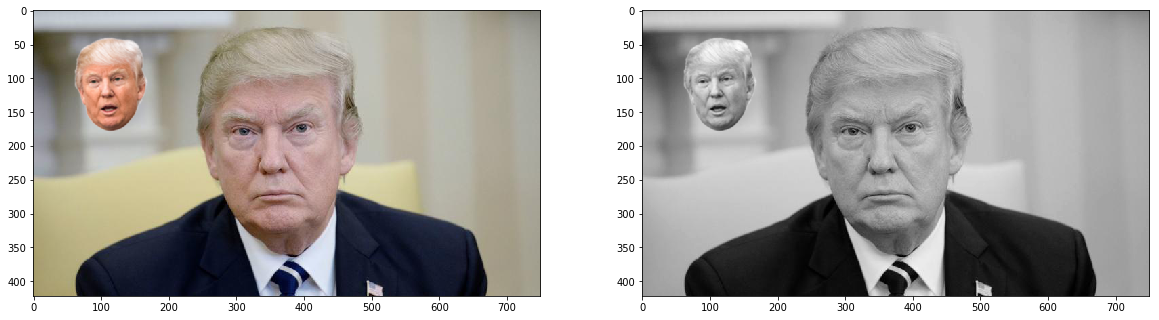

In [39]:
face_image_path = get_path('trump-face2.png')

face_image = cv2.imread(face_image_path)
face_image_gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
ax.imshow(bgr2rgb(face_image))
ax = fig.add_subplot(122)
ax.imshow(face_image_gray, cmap='gray')

# Face detection

In [40]:
def draw_faces(img, faces):
    img_copy = img.copy()
    for face in faces:
        x, y, h, w = face
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 255), 1)
    return img_copy

[[ 59  64  98  98]
 [244  92 219 219]]


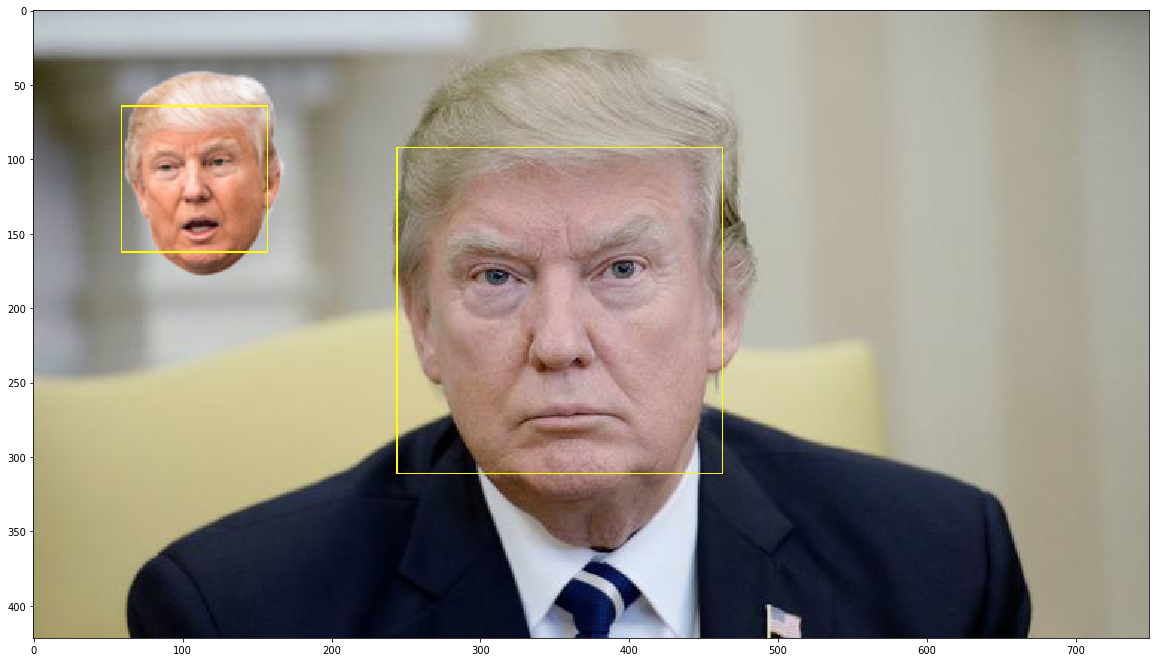

In [41]:
face_detection_model = get_path('resources\\haarcascade_frontalface_alt2.xml')

face_detector = cv2.CascadeClassifier(face_detection_model)
faces = face_detector.detectMultiScale(face_image_gray)
print(faces)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(bgr2rgb(draw_faces(face_image, faces)))

In [42]:
def get_biggest_face(faces):
    biggest_face = None
    narrowest_dim_val = -1
    for f in faces:
        _, _, h, w = f
        narrow_dim_val = h if h < w else w
        if narrow_dim_val >= narrowest_dim_val:
            narrowest_dim_val = narrow_dim_val
            biggest_face = f
    return f

[[244  92 219 219]]


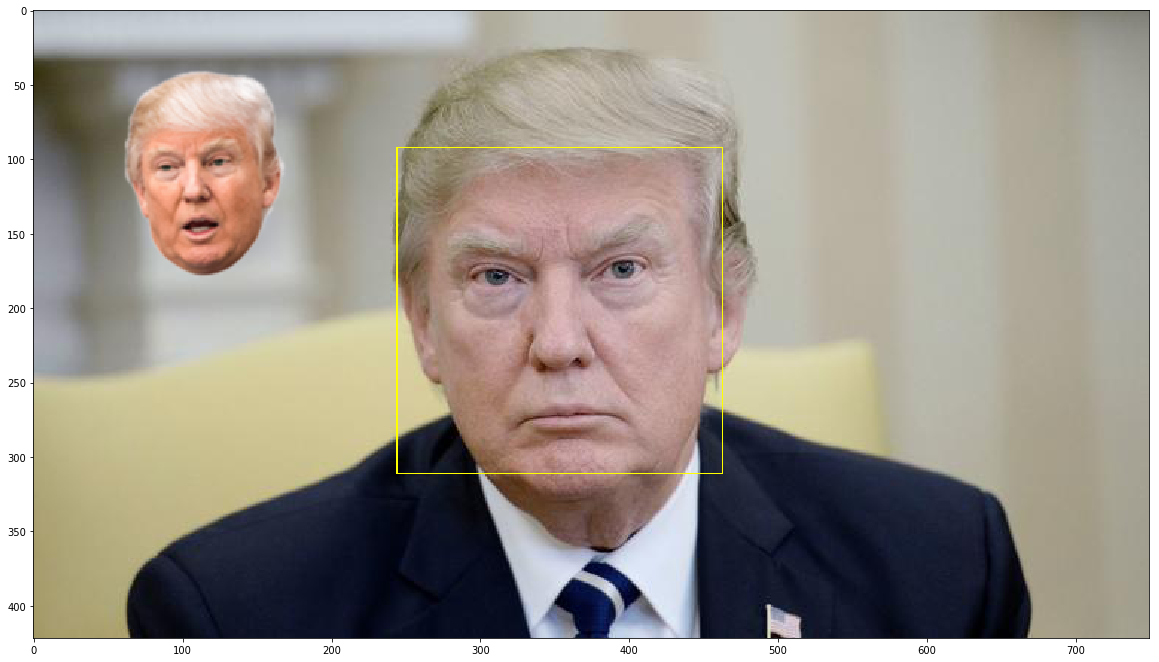

In [43]:
input_faces = np.array([get_biggest_face(faces)])
print(input_faces)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(bgr2rgb(draw_faces(face_image, input_faces)))

# Face landmarks marking

In [44]:
def read_landmarks_datafile(datafile: str, as_integer=False) -> np.ndarray:   
    sample_names = list()
    dataset = list()
    
    with open(datafile, 'r') as fstream:
        is_face_block = False
        
        face_landmarks = list()
        
        for line in fstream:
            line = line.strip()
            
            if line == '--face--':
                is_face_block = True
                sample_names.append(next(fstream))
                continue
                
            elif line == '--end--' and is_face_block:
                is_face_block = False
                dataset.append(np.array(face_landmarks))
                continue
            
            if is_face_block:
                str_values = line.split()
                tag_number, x, y = str_values
                if as_integer:
                    face_landmarks.append([int(tag_number), int(round(float(x))), int(round(float(y)))])
                else:
                    face_landmarks.append([float(tag_number), float(x), float(y)])

                
    return np.array(sample_names), np.array(dataset)

In [45]:
landmarks_datafile = get_path('test-data.txt')
_, landmarks = read_landmarks_datafile(landmarks_datafile, as_integer=True)

print(landmarks[0])

[[  0 260 175]
 [  1 263 200]
 [  2 269 226]
 [  3 274 252]
 [  4 282 278]
 [  5 296 300]
 [  6 317 317]
 [  7 340 328]
 [  8 364 331]
 [  9 389 327]
 [ 10 412 315]
 [ 11 432 297]
 [ 12 445 272]
 [ 13 452 246]
 [ 14 455 219]
 [ 15 457 190]
 [ 16 457 160]
 [ 17 272 167]
 [ 18 285 156]
 [ 19 304 156]
 [ 20 322 161]
 [ 21 339 167]
 [ 22 363 165]
 [ 23 379 156]
 [ 24 397 148]
 [ 25 417 146]
 [ 26 433 153]
 [ 27 351 177]
 [ 28 352 195]
 [ 29 352 212]
 [ 30 353 230]
 [ 31 338 242]
 [ 32 346 244]
 [ 33 355 246]
 [ 34 364 243]
 [ 35 373 241]
 [ 36 294 181]
 [ 37 304 176]
 [ 38 316 176]
 [ 39 327 183]
 [ 40 316 186]
 [ 41 304 186]
 [ 42 380 180]
 [ 43 390 171]
 [ 44 403 169]
 [ 45 414 172]
 [ 46 405 179]
 [ 47 392 181]
 [ 48 329 278]
 [ 49 339 272]
 [ 50 349 267]
 [ 51 358 269]
 [ 52 366 266]
 [ 53 378 269]
 [ 54 392 274]
 [ 55 379 283]
 [ 56 368 286]
 [ 57 359 288]
 [ 58 350 288]
 [ 59 340 285]
 [ 60 334 278]
 [ 61 350 275]
 [ 62 358 275]
 [ 63 366 274]
 [ 64 387 275]
 [ 65 367 274]
 [ 66 358 

In [46]:
def draw_landmarks(img, landmarks):
    img_copy = img.copy()
    for index, x, y in landmarks:
        cv2.circle(img_copy, (x, y), 1, (0, 0, 255), 1)
    return img_copy

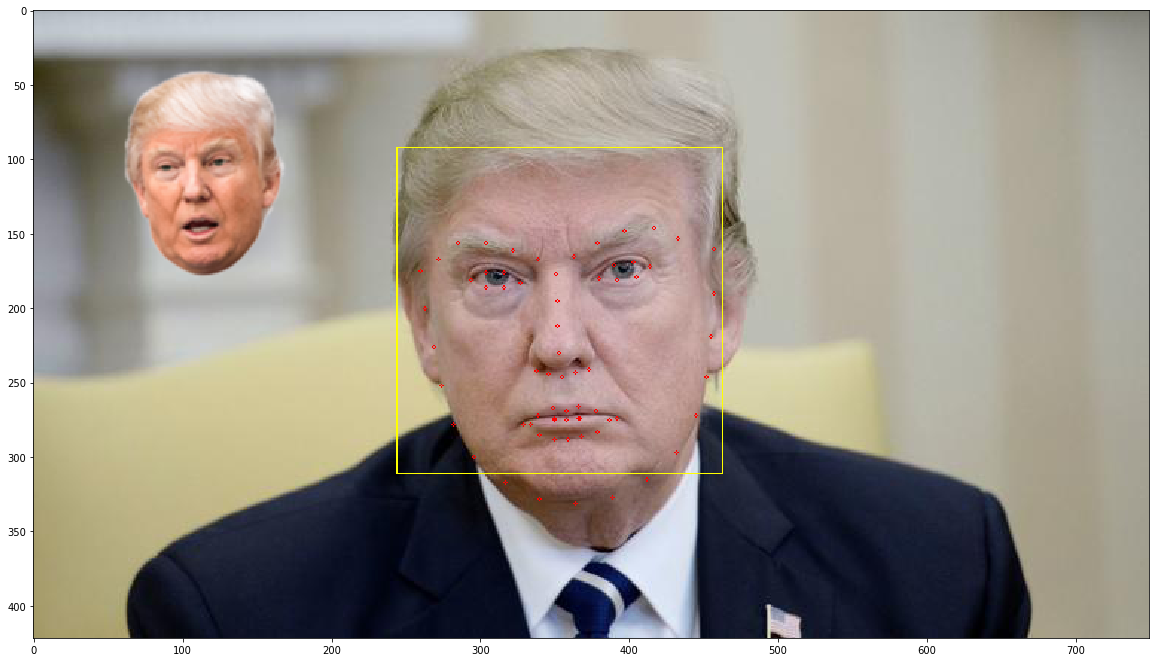

In [47]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(bgr2rgb(draw_landmarks(draw_faces(face_image, input_faces), landmarks[0])))

# Face landmarks normalisation

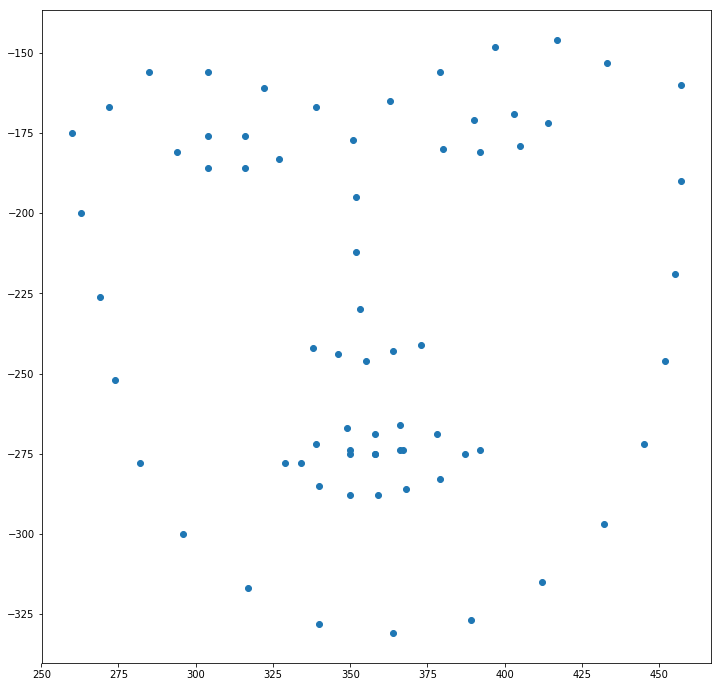

In [48]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(landmarks[0, :, 1], -landmarks[0, :, 2])

In [49]:
landmarks_datafile = get_path('test-data.txt')
_, landmarks = read_landmarks_datafile(landmarks_datafile)

In [50]:
def rebase_landmarks(landmarks: np.ndarray, base_point_idx: int):
    base_point = landmarks[base_point_idx, 1:].copy()
    landmarks[:, 1:] -= base_point

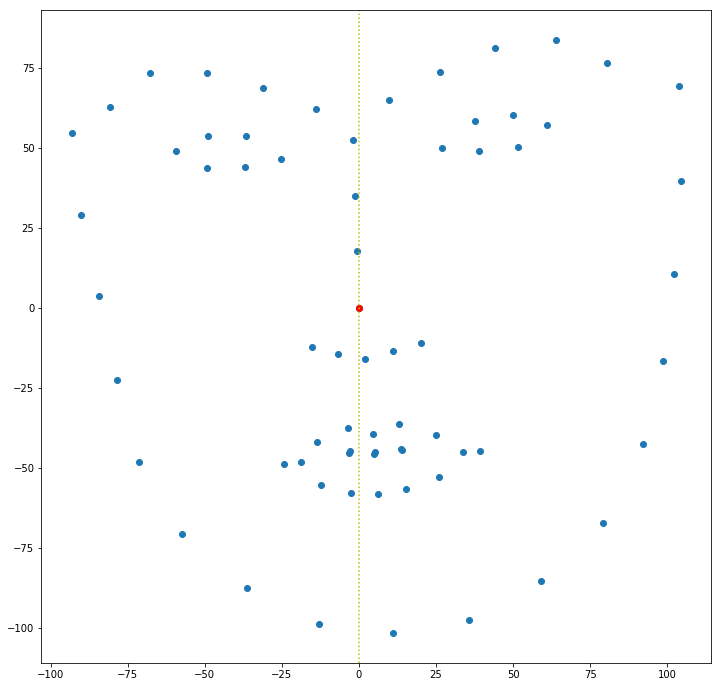

In [51]:
landmarks_centered = landmarks.copy()
rebase_landmarks(landmarks_centered[0], 30)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(landmarks_centered[0,:,1], -landmarks_centered[0,:,2])
ax.scatter(landmarks_centered[0,30,1], landmarks_centered[0,30,2], color='r')
ax.axvline(0, color='y', linestyle=':')

In [52]:
def normalise_landmarks_scale(landmarks: np.ndarray):
    # Get most deviated coordinate
    max_coord_dev = -1
    for x, y in landmarks[:, 1:]:
        x_dev = abs(x)
        y_dev = abs(y)
        coord_dev = x_dev if x_dev > y_dev else y_dev
        if coord_dev >= max_coord_dev:
            max_coord_dev = coord_dev
    
    # Normalise the scale of the landmarks coordinates
    landmarks[:, 1:] /= max_coord_dev

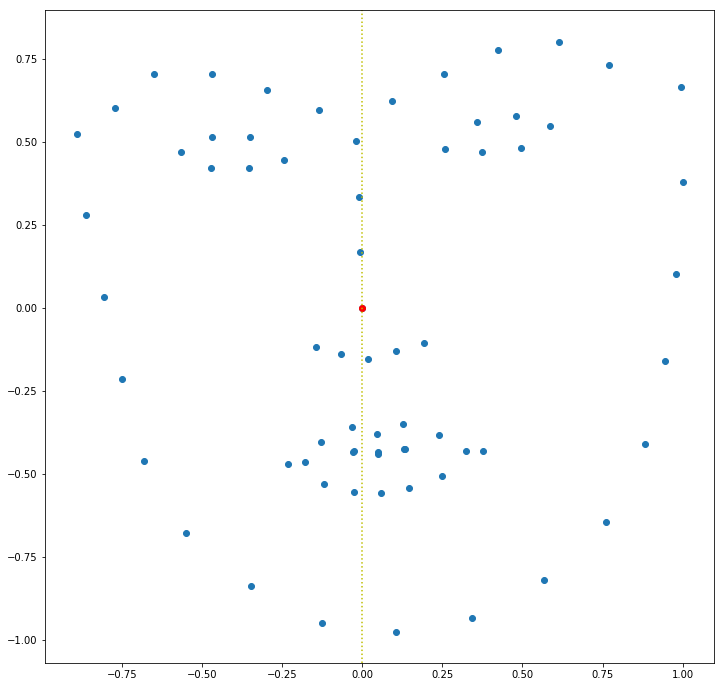

In [53]:
landmarks_norm = landmarks_centered.copy()
normalise_landmarks_scale(landmarks_norm[0])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(landmarks_norm[0,:,1], -landmarks_norm[0,:,2])
ax.scatter(landmarks_norm[0,30,1], landmarks_norm[0,30,2], color='r')
ax.axvline(0, color='y', linestyle=':')

In [54]:
def normalize_landmarks_tilt(landmarks: np.ndarray, tilt_point_idx):
    base_x, base_y = landmarks[tilt_point_idx, 1:]
    magnitude = math.sqrt(base_x**2 + base_y**2)
    cos_alpha = base_x / magnitude
    alpha = math.acos(cos_alpha)
    beta = alpha - math.pi*.5
    R = np.array([
        [math.cos(beta), -math.sin(beta)], 
        [math.sin(beta), math.cos(beta)]
    ])
    for i in range(landmarks.shape[0]):
        x, y = landmarks[i, 1:]
        xr = R[0, 0] * x + R[0, 1] * y
        yr = R[1, 0] * x + R[1, 1] * y
        landmarks[i, 1] = xr
        landmarks[i, 1] = xr

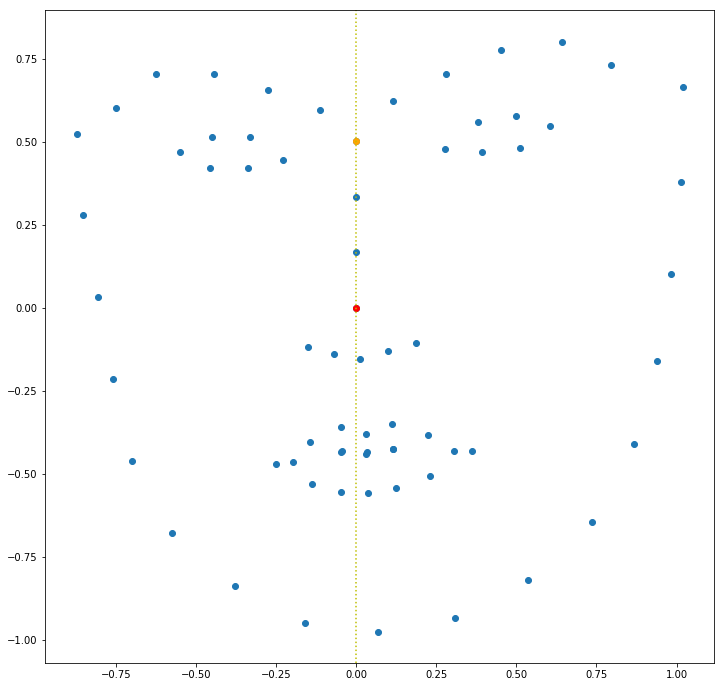

In [55]:
landmarks_rotated = landmarks_norm.copy()
normalize_landmarks_tilt(landmarks_rotated[0], 27)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(landmarks_rotated[0,:,1], -landmarks_rotated[0,:,2])
ax.scatter(landmarks_rotated[0,30,1], -landmarks_rotated[0,30,2], color='r')
ax.scatter(landmarks_rotated[0,27,1], -landmarks_rotated[0,27,2], color='orange')
ax.axvline(0, color='y', linestyle=':')

### Face landmarks marked and normalised prior by c# program "VrFaceExpressDataGather"

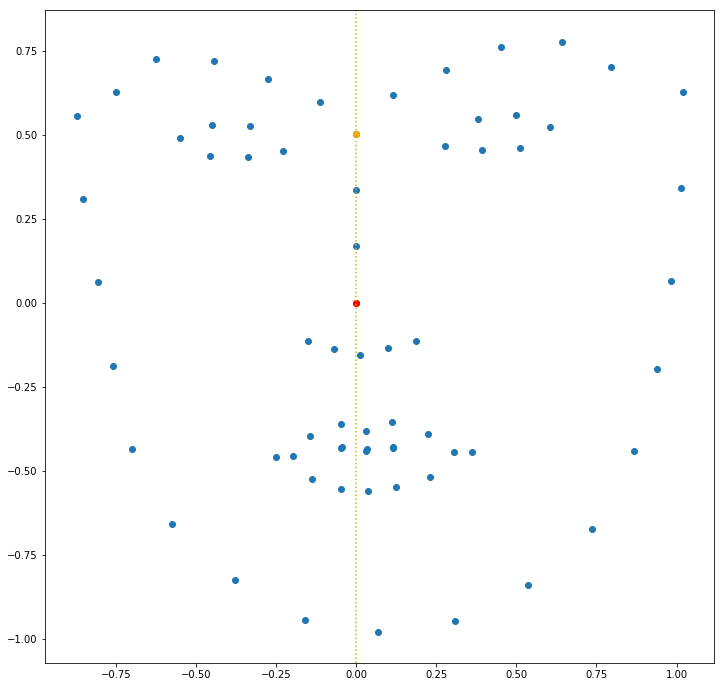

In [62]:
landmarks_datafile = get_path('test-data-norm.txt')
_, norm_landmarks = read_landmarks_datafile(landmarks_datafile)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(norm_landmarks[0,:,1], -norm_landmarks[0,:,2])
ax.scatter(norm_landmarks[0,30,1], -norm_landmarks[0,30,2], color='r')
ax.scatter(norm_landmarks[0,27,1], -norm_landmarks[0,27,2], color='orange')
ax.axvline(0, color='y', linestyle=':')

# Preprocessed datasets merging

In [70]:
def string2array(string: str, dtype: np.dtype) -> np.ndarray:
    return np.array(string.split(), dtype)


def string2image(string: str, dshape, dtype: np.dtype) -> np.ndarray:
    h, w = dshape
    image_dtype = np.uint8 if dtype is None else dtype
    image = np.reshape(string2array(string, image_dtype), (h, w))
    return image


def build_usage_offsets_dataframe(src_dataframe: pd.DataFrame) -> pd.DataFrame:
    offsets_df = pd.DataFrame(index=['From', 'To'], data=0,  columns=src_dataframe.Usage.unique())

    prev_idx = 0
    for col_name in offsets_df.columns[1:]:
        idx = (src_dataframe.Usage.values == col_name)[prev_idx:].argmax() + prev_idx
        offsets_df[col_name].From = idx
        prev_idx = idx

    start_idx = 0
    for col_name, next_col_name in zip(offsets_df.columns[:-1], offsets_df.columns[1:]):
        end_idx = (src_dataframe.Usage.values == next_col_name)[start_idx:].argmax() + start_idx 
        offsets_df[col_name].From = start_idx
        offsets_df[col_name].To = end_idx
        start_idx = end_idx

    offsets_df[offsets_df.columns[-1]][1] = len(src_dataframe)
    return offsets_df


def build_emotion_offsets_dataframe(src_dataframe: pd.DataFrame) -> pd.DataFrame:
    offsets_df = pd.DataFrame(index=['From', 'To'], data=0,  columns=src_dataframe.Emotion.unique())

    prev_idx = 0
    for col_name in offsets_df.columns[1:]:
        idx = (src_dataframe.Emotion.values == col_name)[prev_idx:].argmax() + prev_idx
        offsets_df[col_name].From = idx
        prev_idx = idx

    start_idx = 0
    for col_name, next_col_name in zip(offsets_df.columns[:-1], offsets_df.columns[1:]):
        end_idx = (src_dataframe.Emotion.values == next_col_name)[start_idx:].argmax() + start_idx 
        offsets_df[col_name].From = start_idx
        offsets_df[col_name].To = end_idx
        start_idx = end_idx

    offsets_df[offsets_df.columns[-1]][1] = len(src_dataframe)
    return offsets_df

### Data extracted and preprocessed by VRFaceExpressDataGatherer

In [71]:
image_shape = (350, 350)

preproc_dataset_filepath = get_path('dataset\\faceexpress_dataset_v2.csv')

preproc_datasets_filepaths = [
    get_path('dataset\\faceexpress_dataset_v2_1.csv'),
    get_path('dataset\\faceexpress_dataset_v2_2.csv'),
]

preproc_df = pd.DataFrame(columns=['RefId', 'Emotion', 'LandmarksX', 'LandmarksY', 'Usage'])

for filepath in preproc_datasets_filepaths:
    df = pd.read_csv(filepath)
    print(filepath + ':', 'samples count:', len(df))
    preproc_df = pd.concat([preproc_df, df], copy=False)
       
preproc_df.reset_index(drop=True, inplace=True)
preproc_df.to_csv(preproc_dataset_filepath, index=False)

preproc_df

D:\My Work\VR\dataset\faceexpress_dataset_v2_1.csv: samples count: 8751
D:\My Work\VR\dataset\faceexpress_dataset_v2_2.csv: samples count: 3651


,RefId,Emotion,LandmarksX,LandmarksY,Usage
0,0,6,-0.9817603 -0.9772285 -0.9443181 -0.8903714 -0...,-0.6501337 -0.3752913 -0.08698966 0.19533 0.44...,Training
1,1,3,-0.9761158 -0.9713687 -0.9505804 -0.8999547 -0...,-0.4767559 -0.2261548 0.03220026 0.2868015 0.5...,Training
2,2,3,-0.9644632 -0.961656 -0.9343616 -0.889282 -0.8...,-0.5612193 -0.2988091 -0.04644889 0.2020933 0....,Training
3,3,3,-0.9940907 -1 -0.9842424 -0.9551573 -0.8686826...,-0.6020777 -0.3374976 -0.07179337 0.1813207 0....,Training
4,4,3,-0.9501972 -0.925279 -0.8970452 -0.8700193 -0....,-0.4587606 -0.2347537 -0.01561246 0.2090903 0....,Training
5,5,6,-0.7948889 -0.7715917 -0.7080755 -0.6409862 -0...,-0.3843004 -0.1605769 0.05942683 0.2734181 0.4...,Training
6,6,3,-0.9756155 -0.9989714 -1 -0.961134 -0.86114 -0...,-0.6020952 -0.3368705 -0.07637592 0.1705975 0....,Training
7,7,3,-0.8948658 -0.8920694 -0.8786032 -0.849579 -0....,-0.4740624 -0.2377992 -0.006833008 0.2318598 0...,Training
8,8,6,-0.891812 -0.9070054 -0.8986869 -0.8519775 -0....,-0.6109615 -0.3446218 -0.0776007 0.1771572 0.4...,Training
9,9,6,-0.9676636 -0.9787258 -0.9916057 -1 -0.9443831...,-0.4511919 -0.218403 -0.0008181374 0.2284453 0...,Training


### Emotions classes distribution in the dataset 

In [72]:
preproc_df.groupby('Emotion').nunique()

,RefId,Emotion,LandmarksX,LandmarksY,Usage
Emotion,,,,,
0,221,1,221,221,1
1,20,1,20,20,1
2,12,1,12,12,1
3,4508,1,5175,5175,1
4,117,1,118,118,1
5,345,1,345,345,1
6,5535,1,6502,6502,1


### Dataset sorting by emotion class label

In [73]:
to_shuffle = False
random_seed = 64646464

if to_shuffle:
    sorted_by_emo_preproc_df = preproc_df.sample(frac=1.0, random_state=random_seed)
    sorted_by_emo_preproc_df = sorted_by_emo_preproc_df.sort_values('Emotion').reset_index(drop=True)
else:
    sorted_by_emo_preproc_df = preproc_df.sort_values('Emotion').reset_index(drop=True)
    
sorted_by_emo_preproc_df

,RefId,Emotion,LandmarksX,LandmarksY,Usage
0,2068,0,-0.9627703 -0.9710358 -0.9527595 -0.9058623 -0...,-0.4731604 -0.2191867 0.03516011 0.2879407 0.5...,Training
1,1496,0,-1 -0.9924394 -0.9667749 -0.9191696 -0.831744 ...,-0.6857449 -0.3983679 -0.1327551 0.1382302 0.3...,Training
2,3620,0,-0.8992684 -0.8755789 -0.8346221 -0.7639568 -0...,-0.2213228 0.009404538 0.2310476 0.449347 0.65...,Training
3,8553,0,-0.7619103 -0.7524947 -0.7047589 -0.639935 -0....,-0.321264 -0.1092216 0.120695 0.3476833 0.5586...,Training
4,5347,0,-0.9541487 -0.9820455 -1 -0.999381 -0.9508573 ...,-0.397201 -0.187743 0.02691678 0.2385352 0.439...,Training
5,4386,0,-0.7026041 -0.650904 -0.585924 -0.5241711 -0.4...,0.0430217 0.187391 0.3383945 0.4942699 0.64849...,Training
6,8550,0,-0.9174622 -0.8676175 -0.7832394 -0.6859902 -0...,-0.5985135 -0.3374948 -0.08479345 0.147219 0.3...,Training
7,2292,0,-1 -0.9988213 -0.9735387 -0.9350505 -0.8339408...,-0.5190948 -0.2492016 0.01424758 0.2664935 0.4...,Training
8,66,0,-1 -0.9846917 -0.9399452 -0.8891727 -0.787551 ...,-0.50429 -0.2332332 0.02065657 0.2676314 0.497...,Training
9,7649,0,-0.7378925 -0.7111963 -0.6606407 -0.6012172 -0...,-0.1721081 0.0226271 0.2090582 0.396468 0.5773...,Training


In [74]:
emo_offsets_df = build_emotion_offsets_dataframe(sorted_by_emo_preproc_df)
emo_offsets_df                                    

,0,1,2,3,4,5,6
From,0,221,241,253,5431,5549,5894
To,221,241,253,5431,5549,5894,12402


### Leave classes having the most significant number of samples.

<br> Most significant emotions datasets:
<br> 0 - Anger
<br> 3 - Happiness/joy
<br> 5 - Surprise
<br> 6 - Neutral

In [77]:
significant_emo_preproc_df = pd.concat([
    sorted_by_emo_preproc_df[emo_offsets_df[0].From: emo_offsets_df[0].To],
    sorted_by_emo_preproc_df[emo_offsets_df[3].From: emo_offsets_df[3].To],
    sorted_by_emo_preproc_df[emo_offsets_df[5].From: emo_offsets_df[5].To],
    sorted_by_emo_preproc_df[emo_offsets_df[6].From: emo_offsets_df[6].To],
])
significant_emo_preproc_df

,RefId,Emotion,LandmarksX,LandmarksY,Usage
0,2068,0,-0.9627703 -0.9710358 -0.9527595 -0.9058623 -0...,-0.4731604 -0.2191867 0.03516011 0.2879407 0.5...,Training
1,1496,0,-1 -0.9924394 -0.9667749 -0.9191696 -0.831744 ...,-0.6857449 -0.3983679 -0.1327551 0.1382302 0.3...,Training
2,3620,0,-0.8992684 -0.8755789 -0.8346221 -0.7639568 -0...,-0.2213228 0.009404538 0.2310476 0.449347 0.65...,Training
3,8553,0,-0.7619103 -0.7524947 -0.7047589 -0.639935 -0....,-0.321264 -0.1092216 0.120695 0.3476833 0.5586...,Training
4,5347,0,-0.9541487 -0.9820455 -1 -0.999381 -0.9508573 ...,-0.397201 -0.187743 0.02691678 0.2385352 0.439...,Training
5,4386,0,-0.7026041 -0.650904 -0.585924 -0.5241711 -0.4...,0.0430217 0.187391 0.3383945 0.4942699 0.64849...,Training
6,8550,0,-0.9174622 -0.8676175 -0.7832394 -0.6859902 -0...,-0.5985135 -0.3374948 -0.08479345 0.147219 0.3...,Training
7,2292,0,-1 -0.9988213 -0.9735387 -0.9350505 -0.8339408...,-0.5190948 -0.2492016 0.01424758 0.2664935 0.4...,Training
8,66,0,-1 -0.9846917 -0.9399452 -0.8891727 -0.787551 ...,-0.50429 -0.2332332 0.02065657 0.2676314 0.497...,Training
9,7649,0,-0.7378925 -0.7111963 -0.6606407 -0.6012172 -0...,-0.1721081 0.0226271 0.2090582 0.396468 0.5773...,Training


In [78]:
significant_emo_preproc_df.groupby('Emotion').nunique()

,RefId,Emotion,LandmarksX,LandmarksY,Usage
Emotion,,,,,
0,221,1,221,221,1
3,4508,1,5175,5175,1
5,345,1,345,345,1
6,5535,1,6502,6502,1


In [79]:
sig_emo_offsets_df = build_emotion_offsets_dataframe(significant_emo_preproc_df)
sig_emo_offsets_df

,0,3,5,6
From,0,221,5399,5744
To,221,5399,5744,12252


### Classes dataset sizes normalisation

In [80]:
max_class_samples = 350


def normalise_samples_count(i):
    from_i = sig_emo_offsets_df[i].From
    to_i = sig_emo_offsets_df[i].To
    if to_i > max_class_samples: to_i = from_i + max_class_samples
    return significant_emo_preproc_df[from_i:to_i]


leveled_emo_preproc_df = pd.concat([
    normalise_samples_count(0),
    normalise_samples_count(3),
    normalise_samples_count(5),
    normalise_samples_count(6),
]).reset_index(drop=True)

leveled_emo_preproc_df.groupby('Emotion').nunique()

,RefId,Emotion,LandmarksX,LandmarksY,Usage
Emotion,,,,,
0,221,1,221,221,1
3,350,1,350,350,1
5,345,1,345,345,1
6,350,1,350,350,1


### Final dataset review

In [81]:
preproc_df = leveled_emo_preproc_df
preproc_df

,RefId,Emotion,LandmarksX,LandmarksY,Usage
0,2068,0,-0.9627703 -0.9710358 -0.9527595 -0.9058623 -0...,-0.4731604 -0.2191867 0.03516011 0.2879407 0.5...,Training
1,1496,0,-1 -0.9924394 -0.9667749 -0.9191696 -0.831744 ...,-0.6857449 -0.3983679 -0.1327551 0.1382302 0.3...,Training
2,3620,0,-0.8992684 -0.8755789 -0.8346221 -0.7639568 -0...,-0.2213228 0.009404538 0.2310476 0.449347 0.65...,Training
3,8553,0,-0.7619103 -0.7524947 -0.7047589 -0.639935 -0....,-0.321264 -0.1092216 0.120695 0.3476833 0.5586...,Training
4,5347,0,-0.9541487 -0.9820455 -1 -0.999381 -0.9508573 ...,-0.397201 -0.187743 0.02691678 0.2385352 0.439...,Training
5,4386,0,-0.7026041 -0.650904 -0.585924 -0.5241711 -0.4...,0.0430217 0.187391 0.3383945 0.4942699 0.64849...,Training
6,8550,0,-0.9174622 -0.8676175 -0.7832394 -0.6859902 -0...,-0.5985135 -0.3374948 -0.08479345 0.147219 0.3...,Training
7,2292,0,-1 -0.9988213 -0.9735387 -0.9350505 -0.8339408...,-0.5190948 -0.2492016 0.01424758 0.2664935 0.4...,Training
8,66,0,-1 -0.9846917 -0.9399452 -0.8891727 -0.787551 ...,-0.50429 -0.2332332 0.02065657 0.2676314 0.497...,Training
9,7649,0,-0.7378925 -0.7111963 -0.6606407 -0.6012172 -0...,-0.1721081 0.0226271 0.2090582 0.396468 0.5773...,Training


In [82]:
train_data_frac = .90

n_samples = len(preproc_df)

train_range_from = 0
train_range_to = int(round(n_samples * train_data_frac))

test_range_from = train_range_to
test_range_to = n_samples

print('all samples:', n_samples)
print('training samples:', train_range_to-train_range_from)
print('testing samples:', test_range_to-test_range_from)


# max seed is 4294967295
random_seed = 2576764617

to_shuffle = True

if to_shuffle:
    preproc_df = preproc_df.sample(frac=1.0, random_state=random_seed)

preproc_df[train_range_from:train_range_to] = preproc_df[train_range_from:train_range_to].assign(Usage='Training')

preproc_df[test_range_from:test_range_to] = preproc_df[test_range_from:test_range_to].assign(Usage='Testing')

preproc_df = preproc_df.reset_index(drop=True)

all samples: 1271
training samples: 1144
testing samples: 127


In [83]:
preproc_dataset_ranges_df = build_usage_offsets_dataframe(preproc_df)

preproc_dataset_ranges_df

,Training,Testing
From,0,1144
To,1144,1271


# SVM Classifier

In [84]:
def merge_two_arrays(n: int, array_one: np.ndarray, array_two: np.ndarray) -> np.ndarray:
    merged_array = np.empty(n*2, dtype=array_one.dtype)
    for i in range(n):
        j = i * 2
        merged_array[j] = array_one[i]
        merged_array[j+1] = array_two[i]
    return merged_array

### Training and testing data preparation

In [86]:
train_range_from = preproc_dataset_ranges_df.Training.From
train_range_to = preproc_dataset_ranges_df.Training.To

train_labels = preproc_df.Emotion[train_range_from:train_range_to].astype(np.int64).values

print('training labels size:', train_labels.shape)
print()

landmarks_df = preproc_df.LandmarksX[train_range_from:train_range_to].map(
    lambda s: string2array(s, np.float32)).combine(
    preproc_df.LandmarksY[train_range_from:train_range_to].map(
    lambda s: string2array(s, np.float32)), (lambda a1, a2: merge_two_arrays(a1.size, a1, a2)))

train_data = np.array(np.vstack(landmarks_df.values))

print('training data shape:', train_data.shape)

training labels size: (1144,)

training data shape: (1144, 136)


In [89]:
test_range_from = preproc_dataset_ranges_df.Testing.From
test_range_to = preproc_dataset_ranges_df.Testing.To

test_labels = preproc_df.Emotion[test_range_from:test_range_to].values

landmarks_df = preproc_df.LandmarksX[test_range_from:test_range_to].map(
    lambda s: string2array(s, np.float32)).combine(
    preproc_df.LandmarksY[test_range_from:test_range_to].map(
    lambda s: string2array(s, np.float32)), (lambda a1, a2: merge_two_arrays(a1.size, a1, a2)))

test_data = np.vstack(landmarks_df.values)

print('testing labels size:', test_labels.size)
print('testing data shape:', test_data.shape)

testing labels size: 127
testing data shape: (127, 136)


### Model loading or training

In [93]:
svm_model_filepath: str = get_path('resources\\faceexpress_v5.dat')
# svm_model_filepath: str = ''  # to train new model, uncomment this line, pass new filepath and set `load_model` to False.  
load_model = True

if svm_model_filepath is not None and len(svm_model_filepath) > 0:

    if load_model:
        svm = cv2.ml.SVM_load(svm_model_filepath)
        
    else:
        svm = cv2.ml.SVM_create()
        svm.setC(2.67)
        svm.setGamma(5.383)
        svm.setType(cv2.ml.SVM_C_SVC)
        svm.setKernel(cv2.ml.SVM_LINEAR)

        svm.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)
        svm.save(svm_model_savepath)

### Model testing and evaluation

In [94]:
_, predictions = svm.predict(test_data)

pred_comp_df = pd.DataFrame(
    data=np.hstack((np.expand_dims(test_labels, 1), predictions)),
    columns=['Target', 'Prediction'], dtype=np.int)

pred_comp_matches_df = pred_comp_df.Target.eq(pred_comp_df.Prediction)
pred_comp_matches_df.name = 'Match'
pred_comp_df = pd.concat([pred_comp_df, pred_comp_matches_df], axis=1)

n_matches = pred_comp_df.Match.where(pred_comp_df.Match).count()
print(n_matches, len(pred_comp_df))
success_rate = n_matches / len(pred_comp_df)
print('success rate:', success_rate)

pred_comp_df.head(20)

93 127
success rate: 0.7322834645669292


,Target,Prediction,Match
0,3,3,True
1,3,3,True
2,6,3,False
3,0,0,True
4,0,0,True
5,6,5,False
6,6,3,False
7,6,5,False
8,6,6,True
9,5,5,True


Numerical confussion matrix representation of classification:

[[16  2  1  2]
 [ 2 28  1  3]
 [ 1  2 21  7]
 [ 1  6  6 28]]


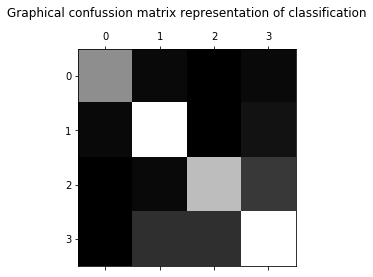

In [107]:
from sklearn.metrics import confusion_matrix


confusion_mat = confusion_matrix(pred_comp_df.Target.values, pred_comp_df.Prediction.values, labels=[0, 3, 5, 6])
print('Numerical confussion matrix representation of classification:\n')
print(confusion_mat)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(confusion_mat, cmap='gray')
ax.set_title('Graphical confussion matrix representation of classification\n')
plt.show()